Yucheng Huang  andrew id: yucheng3

# HW 3.1 Sentiment Analysis [50 + 5 points]

*Contact TA: Runshan Fu (runshanf[at]cmu.edu)*

Download data from: https://www.dropbox.com/s/ouhiwmzodc4baob/HW3-data-Sentiment.zip?dl=0 <br>

The folder contains:

- Train.csv
- test.csv

### 1. Read the training data  [5 Points]

Read the data present in training.csv file. **Please do no change the file name and use relative path, i.e. './HW3-data/train.csv'** <br>
Perform the following cleaning on the data:
1. Keep only the Sentiment and sentiment text in the dataframe - the first and the last coumn
2. Some of the sentiments and sentiment texts are empty. Remove those rows.
3. Shuffle the rows of the data frame such that the positive and negative tweets are mixed
4. Print the first 5 sentiments.
5. Print the number of positive and negative sentiments

In [1]:
########################################################################
######################### Write your code here #########################
########################################################################
import pandas as pd
import numpy as np
df = pd.read_csv('./HW3-data/train.csv', encoding = 'ISO-8859-1', header = None)

df.columns = ['sentiments', '1', '2', '3', '4', 'texts']
df = df[['sentiments', 'texts']]


In [2]:
print(df.isnull().sum()) #no empty rows?
df.dropna(axis=0,how='any') #drop all rows that have any NaN values
df = df.sample(frac=1).reset_index(drop=True)  

sentiments    0
texts         0
dtype: int64


In [3]:

positiveNum = df['sentiments'].sum()
negativeNum = len(df) - positiveNum
print('Number of positive sentiments: ', positiveNum)
print('Number of negative sentiments: ', negativeNum)

Number of positive sentiments:  800000
Number of negative sentiments:  800000


### 2\. Data Preparation  [10 points]

Before building a neural network model, we first need to prepare the data. The input to a RNN model  is a matrix with shape (a, b), where a is the number of samples (twitters), and b is the sequence length of each tweet. Prepare the data with the following steps:

1\. Take the RAW texts of the top 5000 tweets in the dataframe, and convert them to a list of strings, where each string is a tweet. [1 pt]

In [4]:
########################################################################
######################### Write your code here #########################
########################################################################
tweet_list = df['texts'][:5000].astype(str).tolist()

In [5]:
tweet_list

["@IslandGirl3572 Getting ready to call them.  Just checking with other people to see if it's just me.  ",
 'my bestfriend; boyfriend; and brother are participating in Quiz Siapa Berani. Good luck fellas! ',
 'kevin up to now i dont have internet  .... !!!',
 '@jonathansheil hahahah. just today for some reason. they were deathly slow earlier too. ',
 'hahaaa, these kobe &amp; lebron commercials never get old!  AHHHH super close gaaaame!',
 "i am safe &amp; not on fire so those are all pluses for me!  I tied @TruckinDogKarma up &amp; gave here a marrow bone. She's having a picnic",
 'today was sooooo crazy.... we should have our on tv show: tears, tantrums and train rides ',
 '@diamondkim guh I ca barely understand that. My Japanese sucks. ',
 "@VanityIsUnfair I'm going back to Oklahoma in two! Maaan. I won't even get to see you! ",
 'No longer on storm watch ',
 'By the by. Anyone else flip out that @themaguire replied to my nonsense?? That chick is VICIOUS!! ',
 'Morning world, please

2\. Use `Tokenizer` from `keras.preprocessing.text` to tokenize the texts and convert them to sequences (numbers) with `texts_to_sequences` method of `Tokenizer`. **When tokenizing, please only consider the top 10,000 words in the dataset (`num_words`=10,000)**. [4 pts]

In [6]:
########################################################################
######################### Write your code here #########################
########################################################################
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                      lower=True, split=" ",char_level=False)

Using TensorFlow backend.


In [7]:
tokenizer.fit_on_texts(tweet_list)


In [8]:
tokenized_tweet_list = tokenizer.texts_to_sequences(tweet_list)

In [9]:
tokenized_tweet_list

[[3590, 135, 195, 2, 380, 124, 20, 2295, 22, 250, 149, 2, 75, 68, 40, 20, 13],
 [5, 1719, 771, 6, 673, 38, 1720, 10, 3591, 3592, 3593, 25, 282, 3594],
 [2296, 26, 2, 29, 1, 150, 17, 420],
 [3595, 1721, 20, 39, 11, 58, 636, 94, 144, 3596, 637, 1390, 43],
 [3597, 421, 2297, 64, 2298, 3598, 170, 33, 199, 1206, 392, 856, 3599],
 [1,
  67,
  954,
  64,
  23,
  14,
  772,
  16,
  293,
  38,
  31,
  3600,
  11,
  13,
  1,
  3601,
  3602,
  26,
  64,
  857,
  77,
  4,
  3603,
  3604,
  381,
  186,
  4,
  3605],
 [39, 28, 720, 465, 63, 136, 17, 194, 14, 534, 154, 3606, 3607, 6, 773, 3608],
 [3609, 2299, 1, 2300, 1391, 955, 15, 5, 1722, 294],
 [3610, 19, 49, 57, 2, 2301, 10, 212, 3611, 1, 283, 148, 33, 2, 75, 7],
 [34, 535, 14, 1207, 247],
 [125,
  3,
  125,
  352,
  446,
  1723,
  30,
  15,
  3612,
  1392,
  2,
  5,
  1724,
  15,
  1058,
  8,
  3613],
 [105, 321, 172, 1725, 5, 3614, 93, 1, 266, 6, 2302, 3, 2303],
 [3615, 12, 3616, 22, 5, 956],
 [3617,
  18,
  15,
  8,
  3,
  120,
  2304,
  636,

3\. Use `pad_sequences` from `keras.preprocessing.sequence` to pad each sequence with zeros to **make the sequence length 120**. [2 pts]

In [10]:
########################################################################
######################### Write your code here #########################
########################################################################
from keras.preprocessing.sequence import pad_sequences
pad_tweet_list = pad_sequences(tokenized_tweet_list, maxlen=120)


In [11]:
pad_tweet_list

array([[   0,    0,    0, ...,   40,   20,   13],
       [   0,    0,    0, ...,   25,  282, 3594],
       [   0,    0,    0, ...,  150,   17,  420],
       ..., 
       [   0,    0,    0, ...,   41,  132,  208],
       [   0,    0,    0, ...,   18,    1,   29],
       [   0,    0,    0, ..., 1054,  193,   39]], dtype=int32)

4\. Split the above data (the sequence and the label) into training (67%) and validation (33%) sets. [3 pts]

In [12]:
########################################################################
######################### Write your code here #########################
########################################################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pad_tweet_list, df['sentiments'][:5000], test_size=0.33, shuffle=True)


In [13]:
len(X_train)

3350

### 3. Simple RNN [20 points] 

i) [8 points] Build a simple RNN model with the following specification:
1. An embedding layer with output dimenstion 64.
2. A simple RNN layer.
3. A dense layer with sigmoid activation function for prediction.
Print the summary of the model.

In [14]:
########################################################################
######################### Write your code here #########################
########################################################################
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN


model = Sequential()
model.add(Embedding(10000, 64))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________


ii) [12 points] Now train the simple RNN model:

1\. Compile the model with binary cross entory as loss and accuracy as evaluation metrics.

In [15]:
########################################################################
######################### Write your code here #########################
########################################################################
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2\. Fit the model with the training set with 5 epochs and batch size 32.

In [16]:
########################################################################
######################### Write your code here #########################
########################################################################
SRN_result = model.fit(X_train, y_train,
          batch_size=32,
          epochs=5,
          validation_data=(X_test, y_test))

Train on 3350 samples, validate on 1650 samples
Epoch 1/5
3350/3350 [==============================] - 6s 2ms/step - loss: 0.6917 - acc: 0.5218 - val_loss: 0.6853 - val_acc: 0.5442
Epoch 2/5
3350/3350 [==============================] - 5s 1ms/step - loss: 0.4981 - acc: 0.7940 - val_loss: 0.7284 - val_acc: 0.5636
Epoch 3/5
3350/3350 [==============================] - 5s 1ms/step - loss: 0.1705 - acc: 0.9699 - val_loss: 0.8069 - val_acc: 0.5855
Epoch 4/5
3350/3350 [==============================] - 5s 1ms/step - loss: 0.0489 - acc: 0.9958 - val_loss: 0.9243 - val_acc: 0.5745
Epoch 5/5
3350/3350 [==============================] - 5s 1ms/step - loss: 0.0203 - acc: 0.9988 - val_loss: 1.0282 - val_acc: 0.5715


3\. Plot the training and validation accuracy for each epoch.

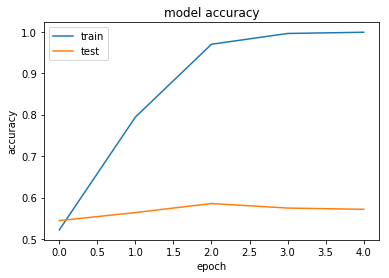

In [17]:
########################################################################
######################### Write your code here #########################
########################################################################
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(SRN_result.history['acc'])
plt.plot(SRN_result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()


### 4. LSTM [10 points] 

i) [2 point] Now built a LSTM model by replacing the simple RNN layter in the above model with a LSTM layer. Print a summary of the LSTM model.

In [18]:
########################################################################
######################### Write your code here #########################
########################################################################
from keras.layers import LSTM
model_L = Sequential()
model_L.add(Embedding(10000, 64))
model_L.add(LSTM(64))
model_L.add(Dense(1, activation='sigmoid'))
model_L.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


ii) [2 point] Train the LSTM model with the same specifications in the simple RNN model. Again, plot the training and validation accuracy for each epoch.

Train on 3350 samples, validate on 1650 samples
Epoch 1/5
3350/3350 [==============================] - 21s 6ms/step - loss: 0.6661 - acc: 0.5881 - val_loss: 0.5926 - val_acc: 0.7073
Epoch 2/5
3350/3350 [==============================] - 20s 6ms/step - loss: 0.4633 - acc: 0.8021 - val_loss: 0.5643 - val_acc: 0.7255
Epoch 3/5
3350/3350 [==============================] - 20s 6ms/step - loss: 0.2624 - acc: 0.8976 - val_loss: 0.6326 - val_acc: 0.7085
Epoch 4/5
3350/3350 [==============================] - 20s 6ms/step - loss: 0.1563 - acc: 0.9484 - val_loss: 0.7509 - val_acc: 0.7158
Epoch 5/5
3350/3350 [==============================] - 20s 6ms/step - loss: 0.0927 - acc: 0.9707 - val_loss: 0.8652 - val_acc: 0.7115


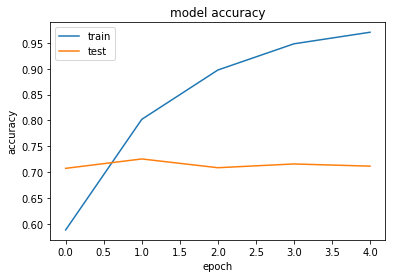

In [19]:
########################################################################
######################### Write your code here #########################
########################################################################
model_L.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
LSTM_result = model_L.fit(X_train, y_train,
          batch_size=32,
          epochs=5,
          validation_data=(X_test, y_test))
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(LSTM_result.history['acc'])
plt.plot(LSTM_result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

iii) [6 points] In the previous models, we only use the top 5000 tweets. Now use the whole dataset, split it into training (67%) and validation (33%) set, and train the same LSTM model on the new traning data. plot the training and validation accuracy for each epoch.

Train on 1072000 samples, validate on 528000 samples
Epoch 1/5
1072000/1072000 [==============================] - 6337s 6ms/step - loss: 0.4167 - acc: 0.8081 - val_loss: 0.3944 - val_acc: 0.8206
Epoch 2/5
1072000/1072000 [==============================] - 6316s 6ms/step - loss: 0.3768 - acc: 0.8302 - val_loss: 0.3843 - val_acc: 0.8262
Epoch 3/5
 352448/1072000 [========>.....................] - ETA: 1:03:11 - loss: 0.3535 - acc: 0.8430

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 528320/1072000 [=============>................] - ETA: 47:48 - loss: 0.3543 - acc: 0.8425

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 706304/1072000 [==================>...........] - ETA: 32:08 - loss: 0.3557 - acc: 0.8419

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1072000/1072000 [==============================] - 6319s 6ms/step - loss: 0.3573 - acc: 0.8410 - val_loss: 0.3850 - val_acc: 0.8264
Epoch 4/5
1072000/1072000 [==============================] - 6310s 6ms/step - loss: 0.3409 - acc: 0.8497 - val_loss: 0.3847 - val_acc: 0.8272
Epoch 5/5
1072000/1072000 [==============================] - 6296s 6ms/step - loss: 0.3255 - acc: 0.8579 - val_loss: 0.3905 - val_acc: 0.8256


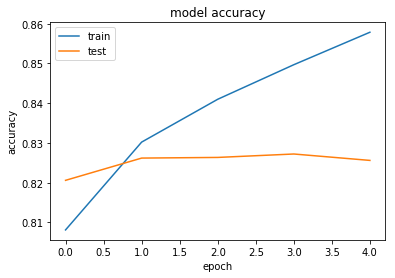

In [20]:
########################################################################
######################### Write your code here #########################
########################################################################
tweet_list = df['texts'].astype(str).tolist()

tokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                      lower=True, split=" ",char_level=False)

tokenizer.fit_on_texts(tweet_list)

tokenized_tweet_list = tokenizer.texts_to_sequences(tweet_list)

pad_tweet_list = pad_sequences(tokenized_tweet_list, maxlen=120)

X_train, X_test, y_train, y_test = train_test_split(pad_tweet_list, df['sentiments'], test_size=0.33, shuffle=True)

LSTM_result = model_L.fit(X_train, y_train,
          batch_size=32,
          epochs=5,
          validation_data=(X_test, y_test))
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(LSTM_result.history['acc'])
plt.plot(LSTM_result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### 4. Results Comparision [5 points]

1\. [2 points] Compare the simple RNN model and the LSTM model (trained on the 5000 tweets sample). Which one has a better performance? Why does this one outperform the other one?

A:The test accuracy of simple RNN is around 0.55. The test accuracy of LSTM model is around 0.7.The LSTM model performs better than the simple RNN model. LSTMs have longer memory. In this circumstance, the information of each epoch can be feedback to the previous one. So the LSTM keeps more information and thus have a better performance.

3\. [3 points] Compare the LSTM model trained on a 5000 tweets sample and the one trained on the whole dataset. What are the cost and the benefit of each case?

A: The test accuracy on the 5000 is around 0.7. It takes 20 seconds for each epoch. The test accuracy on the whole dataset is around 0.82. It takes 6300 seconds for each epoch. The 5000 one runs faster but has lower accuracy. The whole one runs slowlier but has higher accuracy.

### BONUS [5 points]
Run the method you prefer on the test.csv data provided to you. Perform the necessary steps to get the feature matrix and apply the desired model to produce semantic lables.

In [21]:
########################################################################
######################### Write your code here #########################
########################################################################
df2 = pd.read_csv('./HW3-data/test.csv', encoding = 'ISO-8859-1', header = None)

df2.columns = ['sentiments', '1', '2', '3', '4', 'texts']
df2 = df2[['sentiments', 'texts']]

tweet_list = df2['texts'].astype(str).tolist()

tokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                      lower=True, split=" ",char_level=False)

tokenizer.fit_on_texts(tweet_list)

tokenized_tweet_list = tokenizer.texts_to_sequences(tweet_list)

X_test = pad_sequences(tokenized_tweet_list, maxlen=120)

y_test = df2['sentiments']

# Use the LSTM model
y_predict = model_L.predict(X_test, batch_size = 32)

df3 = pd.DataFrame()

score, acc = model_L.evaluate(X_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

df3['y_true'] = y_test
df3['y_pred'] = y_predict

df3

498/498 [==============================] - 1s 1ms/step
Test score: 0.946763133428
Test accuracy: 0.502008032129


,y_true,y_pred
0,1,0.178255
1,1,0.858452
2,1,0.410450
3,1,0.315159
4,1,0.781114
5,1,0.271627
6,0,0.674122
7,1,0.926215
8,1,0.834217
9,1,0.905235


In [53]:
# Use the SimpleRNN model
y_predict_SimpleRNN = model.predict(X_test, batch_size = 32)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

498/498 [==============================] - 0s 376us/step
Test score: 1.35006135439
Test accuracy: 0.483935743929


In [41]:
# select the threhold
def threshold(j):
    y_label = []
    for i in y_predict:
        if i > j:
            y_label.append(1)
        else:
            y_label.append(0)
    count = 0
    for i in range(len(y_test)):
        if y_test[i] == y_label[i]:
            count += 1
    print(count / len(y_test))




In [50]:
import numpy as np
for i in np.arange(0.5,0.95,0.025):
    print(i,":")
    threshold(i)

0.5 :
0.5020080321285141
0.525 :
0.5020080321285141
0.55 :
0.5060240963855421
0.575 :
0.5180722891566265
0.6 :
0.5281124497991968
0.625 :
0.5401606425702812
0.65 :
0.5441767068273092
0.675 :
0.5461847389558233
0.7 :
0.5562248995983936
0.725 :
0.5742971887550201
0.75 :
0.5943775100401606
0.775 :
0.6004016064257028
0.8 :
0.6044176706827309
0.825 :
0.608433734939759
0.85 :
0.6204819277108434
0.875 :
0.6224899598393574
0.9 :
0.6244979919678715
0.925 :
0.6224899598393574


In [47]:
y_label = []
for i in y_predict:
    if i > 0.9:
        y_label.append(1)
    else:
        y_label.append(0)
df3['y_label'] = y_label
df3

,y_true,y_pred,y_label
0,1,0.178255,0
1,1,0.858452,0
2,1,0.410450,0
3,1,0.315159,0
4,1,0.781114,0
5,1,0.271627,0
6,0,0.674122,0
7,1,0.926215,1
8,1,0.834217,0
9,1,0.905235,1
